<center>
    <h1> Michael Stephens

<center>
    <h2> Twitter Text Report


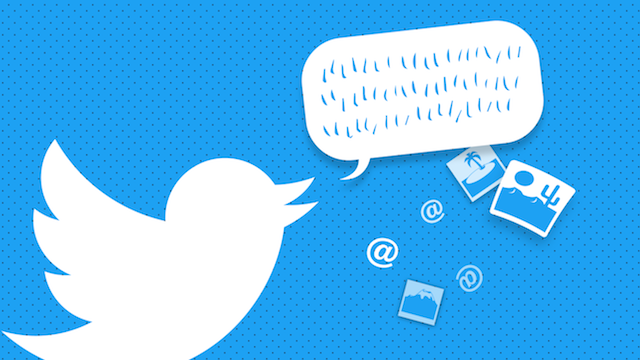

<center>
<h3> HYPOTHESIS

<center><h5>My hypothesis is that Tweets which have either a high negative score or a high positive score (as measured by VADER sentiment analysis) will receive more impressions as compared to Tweets with lower negative or positive scores.  I suspect this because it is taken as "common knowledge" that passionate and emotionally charged content performs better on the internet than less sensational, fact-based, neutral-feeling content.  I suspect a politically divisive topic like human-activity-induced climate change will provide samples with high and low negative and positive scores as well as relatively neutral examples for comparison across each dimension.

To test this hypothesis, I plan to import a provided selection of data from Twitter, process the imported data to remove stopwords and punctuation, and conduct a word frequency analysis to ensure the data is relevant and applicable.  Then, I will conduct a VADER analysis on remaining words within the Tweets.  Using the VADER scores, I will sort the Tweets by their VADER scores, allowing me to identify several different categories of Tweets: 
<ul>
<li>Those with High Positive scores
<li>Those with Low Positive scores
<li>Those with High Neutrality scores
<li>Those with Low Neutrality scores
<li>Those with High Negative scores
<li>Those with Low Negative scores
</ul>    


After breaking the Tweets down into these categories, I can find the average number of impressions the Tweets in each category received, finally comparing each category to test the hypothesis.

###### Step 1 is to import needed libraries, read in the Twitter data, and identify the file structure.

In [203]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings

In [204]:
oly_uniq = pd.read_csv('C:\\Users\\waxen\\Desktop\\ClimateChange_Apr3-Apr4_2013_fixed.csv')
oly_uniq.keys()

Index(['Unnamed: 0', 'Date', 'Title', 'Url', 'Domain', 'Language', 'Author',
       'Full Name', 'Full Text', 'Impressions', 'Original Url',
       'Thread Author', 'Thread Created Date', 'Thread Entry Type',
       'Twitter Followers', 'Twitter Following', 'Twitter Reply Count',
       'Twitter Retweets', 'Twitter Verified'],
      dtype='object')

###### Checking the identified language of each Tweet, it seems likely all the data is in English.

In [205]:
oly_uniq['Language'].head(20)

0     en
1     en
2     en
3     en
4     en
5     en
6     en
7     en
8     en
9     en
10    en
11    en
12    en
13    en
14    en
15    en
16    en
17    en
18    en
19    en
Name: Language, dtype: object

###### Inspecting a random item within the data provides a particularly negative-feeling example.  Line 16 will be a good test case for the VADER analysis later.

In [206]:
oly_uniq["Full Text"][16]

"Pathetically Old & Senile Ted Turner Tells Obama to Get 'Climate Change Under Control' http://t.co/EWmq2MXGfg"

###### Printing the database, ensuring only English data is used gives the following:

In [207]:
en_only = oly_uniq.loc[oly_uniq['Language'] == 'en']
en_only

,Unnamed: 0,Date,Title,Url,Domain,Language,Author,Full Name,Full Text,Impressions,Original Url,Thread Author,Thread Created Date,Thread Entry Type,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Retweets,Twitter Verified
0,0,2013-04-04 23:59:06.0,RT @MarionGroves Abbott says 10yrs ago he wore...,http://twitter.com/Qldaah/statuses/31996236101...,twitter.com,en,Qldaah,Qldaah (David Marler),RT @MarionGroves Abbott says 10yrs ago he wore...,1413,http://twitter.com/Qldaah/statuses/31996236101...,NaN,NaN,post,1413,1990,0,0,False
1,2,2013-04-04 23:58:04.0,RT @NSWFarmers RT @AustFarmInstitu: Two climat...,http://twitter.com/TheFacelessSpin/statuses/31...,twitter.com,en,TheFacelessSpin,TheFacelessSpin (FacelessFocusGroup),RT @NSWFarmers RT @AustFarmInstitu: Two climat...,1063,http://twitter.com/TheFacelessSpin/statuses/31...,NaN,NaN,post,1063,471,0,0,False
2,3,2013-04-04 23:57:33.0,Steve Stockman Hopes James Hansen's NASA Retir...,http://twitter.com/iamgreenbean/statuses/31996...,twitter.com,en,iamgreenbean,iamgreenbean (Green Bean),Steve Stockman Hopes James Hansen's NASA Retir...,4365,http://twitter.com/iamgreenbean/statuses/31996...,NaN,NaN,post,4365,4369,0,0,False
3,4,2013-04-04 23:57:01.0,Ted Turner Tells Obama to Get 'Climate Change ...,http://twitter.com/cpwilldo/statuses/319961839...,twitter.com,en,cpwilldo,cpwilldo (chris price),Ted Turner Tells Obama to Get 'Climate Change ...,3477,http://twitter.com/cpwilldo/statuses/319961839...,NaN,NaN,post,3477,3806,0,0,False
4,5,2013-04-04 23:56:52.0,The human race will never fully adapt to clima...,http://twitter.com/GreenSteve_com/statuses/319...,twitter.com,en,GreenSteve_com,GreenSteve_com (Green Steve),The human race will never fully adapt to clima...,5298,http://twitter.com/GreenSteve_com/statuses/319...,NaN,NaN,post,5298,4840,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7146,10062,2013-04-03 00:01:46.0,RT @SebHenbest The @ClimateComm new report lin...,http://twitter.com/kmac/statuses/3192382570051...,twitter.com,en,kmac,kmac (Kate Mackenzie),RT @SebHenbest The @ClimateComm new report lin...,3826,http://twitter.com/kmac/statuses/3192382570051...,NaN,NaN,post,3826,1657,0,0,True
7147,10063,2013-04-03 00:01:26.0,Think it's all hype? Might wanna listen to thi...,http://twitter.com/LFreshwater/statuses/319238...,twitter.com,en,LFreshwater,LFreshwater (Lou Freshwater),Think it's all hype? Might wanna listen to thi...,1048,http://twitter.com/LFreshwater/statuses/319238...,NaN,NaN,post,1048,719,0,0,False
7148,10070,2013-04-03 00:00:30.0,"Bhandari: All crises (energy, food, climate ch...",http://twitter.com/diegofguillen/statuses/3192...,twitter.com,en,diegofguillen,diegofguillen (diegofguillen),"Bhandari: All crises (energy, food, climate ch...",211,http://twitter.com/diegofguillen/statuses/3192...,NaN,NaN,post,211,238,0,0,False
7149,10071,2013-04-03 00:00:21.0,"#GlobalWarming Accelerating, Study Says - http...",http://twitter.com/greenerideal/statuses/31923...,twitter.com,en,greenerideal,greenerideal (Greener Ideal),"#GlobalWarming Accelerating, Study Says - http...",4776,http://twitter.com/greenerideal/statuses/31923...,NaN,NaN,post,4776,2631,0,0,False


In [208]:
en_only['Full Text'].head()

0    RT @MarionGroves Abbott says 10yrs ago he wore...
1    RT @NSWFarmers RT @AustFarmInstitu: Two climat...
2    Steve Stockman Hopes James Hansen's NASA Retir...
3    Ted Turner Tells Obama to Get 'Climate Change ...
4    The human race will never fully adapt to clima...
Name: Full Text, dtype: object

In [209]:
en_only['text_lower'] = [x.lower() for x in en_only['Full Text']]
en_only['text_lower'].head(20)

0     rt @mariongroves abbott says 10yrs ago he wore...
1     rt @nswfarmers rt @austfarminstitu: two climat...
2     steve stockman hopes james hansen's nasa retir...
3     ted turner tells obama to get 'climate change ...
4     the human race will never fully adapt to clima...
5     #climate climate change will increase extreme ...
6     climate change: addressing the challenge of su...
7     #vannews bc political candidates tackle climat...
8     rt @greenistweet #climatechange will double ar...
9     rt @huffpostgreen now you can blame that rash ...
10    creamydk: dnews: bringing climate change to th...
11    rt @nrdc just tuning in? watch @revyearwood sp...
12    we can debate this or that aspect of climate c...
13    we have cancer to cure aids,world hunger,clima...
14    rt @yaleclimatecomm #worldbank pres calls #cli...
15    interested in climate change policy and carbon...
16    pathetically old & senile ted turner tells oba...
17    obama: i need sharper message on climate c

In [210]:
warnings.filterwarnings('ignore')

In [211]:
en_only['Full Text'][16]

"Pathetically Old & Senile Ted Turner Tells Obama to Get 'Climate Change Under Control' http://t.co/EWmq2MXGfg"

###### Now that the data structure has been established and explored, the process of processing the data can begin.

In [212]:
import nltk
from nltk import tokenize as tk
from nltk import FreqDist
from nltk.corpus import stopwords
import matplotlib
import string

In [213]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\waxen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [214]:
en_only['tokens'] = [tk.word_tokenize(x) for x in en_only['text_lower']]
en_only['tokens'].head(5)

0    [rt, @, mariongroves, abbott, says, 10yrs, ago...
1    [rt, @, nswfarmers, rt, @, austfarminstitu, :,...
2    [steve, stockman, hopes, james, hansen, 's, na...
3    [ted, turner, tells, obama, to, get, 'climate,...
4    [the, human, race, will, never, fully, adapt, ...
Name: tokens, dtype: object

###### Tokenizing our example shows us that the Tweets are now broken down into discrete objects, most of which we would refer to as "words."

In [215]:
en_only['tokens'][16]

['pathetically',
 'old',
 '&',
 'senile',
 'ted',
 'turner',
 'tells',
 'obama',
 'to',
 'get',
 "'climate",
 'change',
 'under',
 'control',
 "'",
 'http',
 ':',
 '//t.co/ewmq2mxgfg']

In [216]:
nltk.download('stopwords')
mystopwords = stopwords.words('english')
mystopwords.append("n't")
mystopwords.append("'s")
len(mystopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\waxen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


181

In [217]:
filtered = []
for i in en_only['tokens']:
    filtered.append([word for word in i if word not in mystopwords])
    
en_only['filtered'] = filtered

###### Filtering out a predetermined list of low-value words, many of which are conjunctions and prepositions, leaves us with:

In [218]:
en_only['filtered'][16]

['pathetically',
 'old',
 '&',
 'senile',
 'ted',
 'turner',
 'tells',
 'obama',
 'get',
 "'climate",
 'change',
 'control',
 "'",
 'http',
 ':',
 '//t.co/ewmq2mxgfg']

###### Further filtering out much of the commonly used punctuation leaves our example understandable but more easily processed:

In [219]:
no_punct = []
for i in en_only['filtered']:
    no_punct.append([word for word in i if word not in string.punctuation])
    
en_only['no_punct'] = no_punct
en_only['no_punct'][16]

['pathetically',
 'old',
 'senile',
 'ted',
 'turner',
 'tells',
 'obama',
 'get',
 "'climate",
 'change',
 'control',
 'http',
 '//t.co/ewmq2mxgfg']

In [220]:
freq1 = [FreqDist(x) for x in en_only['no_punct']]
en_only['freqs1'] = freq1
en_only['freqs1']

0       {'rt': 1, 'mariongroves': 1, 'abbott': 1, 'say...
1       {'rt': 2, 'nswfarmers': 1, 'austfarminstitu': ...
2       {'steve': 1, 'stockman': 1, 'hopes': 1, 'james...
3       {'ted': 1, 'turner': 1, 'tells': 1, 'obama': 1...
4       {'human': 1, 'race': 1, 'never': 1, 'fully': 1...
                              ...                        
7146    {'rt': 1, 'sebhenbest': 1, 'climatecomm': 1, '...
7147    {'think': 1, 'hype': 1, 'might': 1, 'wan': 1, ...
7148    {'bhandari': 1, 'crises': 1, 'energy': 1, 'foo...
7149    {'globalwarming': 1, 'accelerating': 1, 'study...
7150    {'americans': 1, 'want': 1, 'renewable': 1, 'e...
Name: freqs1, Length: 7151, dtype: object

###### With common words and punctuation filtered out, we can examine how often different words appear within the data:

In [221]:
from collections import Counter

In [222]:
A = Counter(en_only['freqs1'][0])
B = Counter(en_only['freqs1'][1])
A + B

Counter({'rt': 3,
         'mariongroves': 1,
         'abbott': 1,
         'says': 1,
         '10yrs': 1,
         'ago': 1,
         'wore': 1,
         'speedos': 1,
         '289': 1,
         'days': 1,
         'year': 1,
         'changed': 1,
         'therefore': 1,
         'climate': 2,
         'change': 2,
         'http': 2,
         '//t.co/hvfjlwq8m4': 1,
         'nswfarmers': 1,
         'austfarminstitu': 1,
         'two': 1,
         'reports': 1,
         'one': 1,
         'week': 1,
         'distinctly': 1,
         'different': 1,
         'conclusions': 1,
         '//t.co/brzafgvexc': 1,
         'auspol': 1})

In [223]:
en_only['f1_counts'] = [Counter(x) for x in en_only['freqs1']]
en_only['f1_counts'][16]

Counter({'pathetically': 1,
         'old': 1,
         'senile': 1,
         'ted': 1,
         'turner': 1,
         'tells': 1,
         'obama': 1,
         'get': 1,
         "'climate": 1,
         'change': 1,
         'control': 1,
         'http': 1,
         '//t.co/ewmq2mxgfg': 1})

In [224]:
wordcounts = Counter()
for i in en_only['f1_counts']:
    wordcounts += i

In [225]:
len(wordcounts)

15028

In [226]:
type(wordcounts)

collections.Counter

In [227]:
dict(wordcounts)

{'rt': 2791,
 'mariongroves': 3,
 'abbott': 150,
 'says': 172,
 '10yrs': 1,
 'ago': 23,
 'wore': 1,
 'speedos': 1,
 '289': 1,
 'days': 19,
 'year': 44,
 'changed': 26,
 'therefore': 3,
 'climate': 6339,
 'change': 6008,
 'http': 5463,
 '//t.co/hvfjlwq8m4': 1,
 'nswfarmers': 1,
 'austfarminstitu': 1,
 'two': 16,
 'reports': 13,
 'one': 107,
 'week': 35,
 'distinctly': 2,
 'different': 15,
 'conclusions': 2,
 '//t.co/brzafgvexc': 1,
 'auspol': 146,
 'steve': 11,
 'stockman': 10,
 'hopes': 5,
 'james': 146,
 'hansen': 117,
 'nasa': 184,
 'retirement': 8,
 'encourage': 8,
 'denial': 54,
 '//t.co/ewwx7pqwuz': 1,
 'via': 564,
 'huffpostpol': 4,
 'ted': 25,
 'turner': 13,
 'tells': 26,
 'obama': 222,
 'get': 143,
 "'climate": 38,
 'control': 55,
 '//t.co/hhgdcedptl': 1,
 'mediabias': 1,
 'human': 51,
 'race': 4,
 'never': 41,
 'fully': 8,
 'adapt': 88,
 'need': 116,
 'sooner': 3,
 'rather': 15,
 'later': 6,
 '//t.co/seb7dp3ywo': 2,
 'increase': 21,
 'extreme': 330,
 'precipitation': 7,
 'leve

In [228]:
counts = pd.DataFrame.from_dict(dict(wordcounts), orient='index')
counts

,0
rt,2791
mariongroves,3
abbott,150
says,172
10yrs,1
...,...
predatory,1
gr,1
//t.co/gl4hqosilt,1
//t.co/q2gzjmxn7i,1


In [229]:
counts = counts.rename(columns = {0: 'counts'})
counts

,counts
rt,2791
mariongroves,3
abbott,150
says,172
10yrs,1
...,...
predatory,1
gr,1
//t.co/gl4hqosilt,1
//t.co/q2gzjmxn7i,1


###### Unsurprisingly, "climate", "change", and "climatechange" (likely a hashtag with the # having been removed) are the top 3 words identified in the data.  Other high-occurrence words are "global", "weather", and "world", which also seem correct and appropriate. 

In [230]:
count_sort = counts.sort_values('counts', ascending = False)[:40]
count_sort

,counts
climate,6339
change,6008
http,5463
rt,2791
climatechange,1353
...,988
``,725
'',722
via,564
global,407


In [231]:
from matplotlib import pyplot as plt

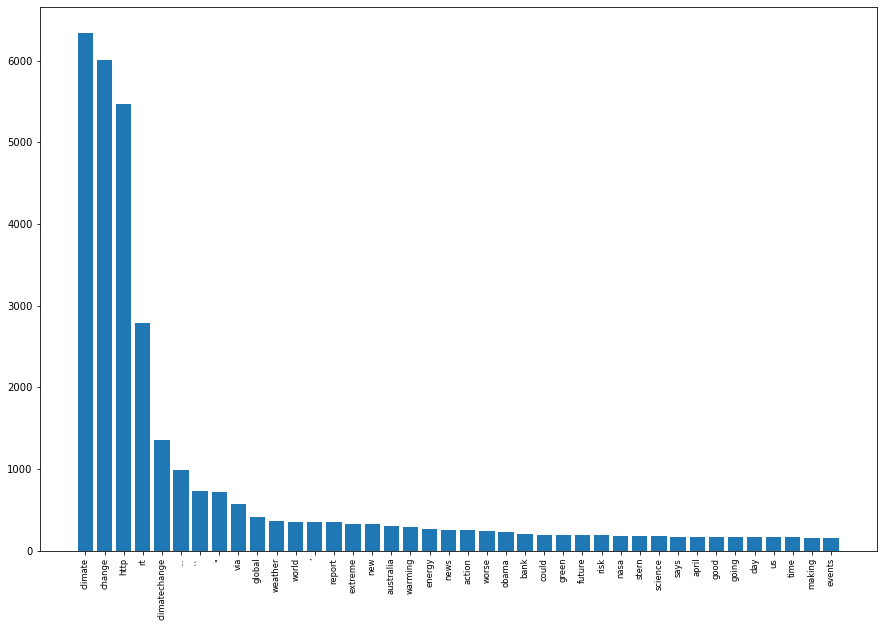

In [232]:
fig, ax0 = plt.subplots(figsize=(15,10))
ax0.bar(count_sort.index, count_sort['counts'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

###### With the text filtered and simplified, and word count completed, we can now begin analyzing the contents:

In [233]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

###### Our negative-feeling example from above does score negatively when analyzed by VADER:

In [234]:
print(en_only['Full Text'][16])
print(analyser.polarity_scores(en_only['Full Text'][16]))

Pathetically Old & Senile Ted Turner Tells Obama to Get 'Climate Change Under Control' http://t.co/EWmq2MXGfg
{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.4215}


In [235]:
en_only['vader_scores'] = [analyser.polarity_scores(x) for x in en_only['Full Text']]
en_only['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5     {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...
6     {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...
7     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
8     {'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'comp...
9     {'neg': 0.338, 'neu': 0.662, 'pos': 0.0, 'comp...
10    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
11    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
12    {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp...
13    {'neg': 0.363, 'neu': 0.513, 'pos': 0.124, 'co...
14    {'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'comp...
15    {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...
16    {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...
17    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp

###### Breaking down the 3 VADER scores for Line 16 text, we have:

In [236]:
en_only['vader_scores'][16]['pos']

0.0

In [237]:
en_only['vader_scores'][16]['neu']

0.833

In [238]:
en_only['vader_scores'][16]['neg']

0.167

###### Collecting Positive, Neutral, and Negative scores in isolation of other factors and graphing each:

In [239]:
en_only['pos'] = [x['pos'] for x in en_only['vader_scores']]
en_only['pos']

0       0.073
1       0.000
2       0.319
3       0.000
4       0.000
        ...  
7146    0.000
7147    0.000
7148    0.110
7149    0.000
7150    0.269
Name: pos, Length: 7151, dtype: float64

In [240]:
en_only['neu'] = [x['neu'] for x in en_only['vader_scores']]
en_only['neu']

0       0.927
1       1.000
2       0.681
3       1.000
4       1.000
        ...  
7146    1.000
7147    0.837
7148    0.890
7149    1.000
7150    0.731
Name: neu, Length: 7151, dtype: float64

In [241]:
en_only['neg'] = [x['neg'] for x in en_only['vader_scores']]
en_only['neg']

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
        ...  
7146    0.000
7147    0.163
7148    0.000
7149    0.000
7150    0.000
Name: neg, Length: 7151, dtype: float64

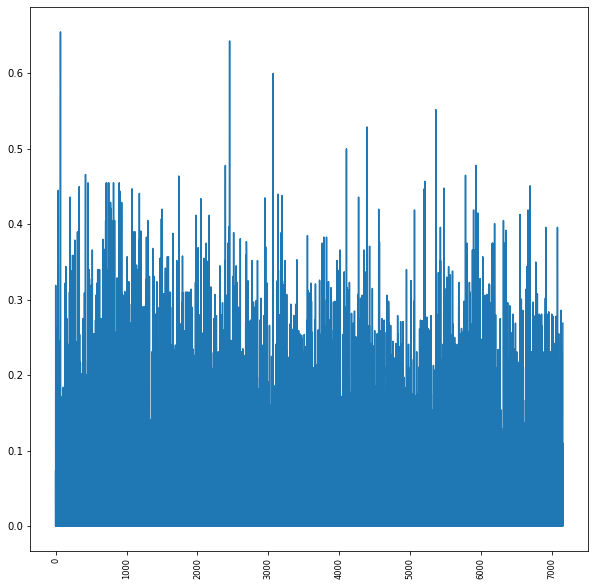

In [242]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(en_only['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

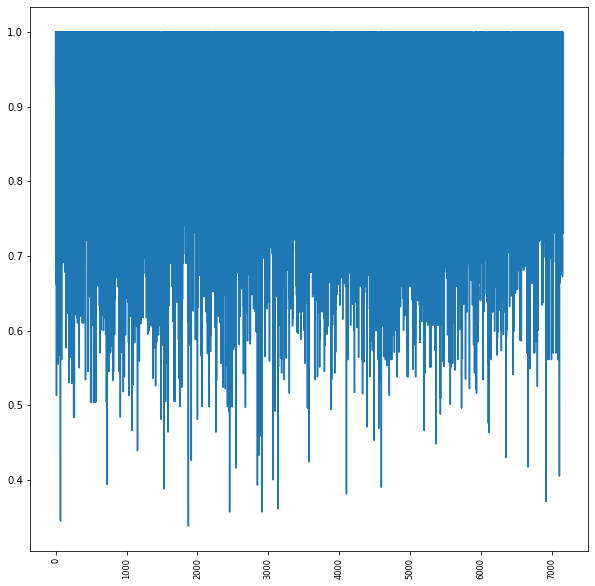

In [243]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(en_only['neu'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

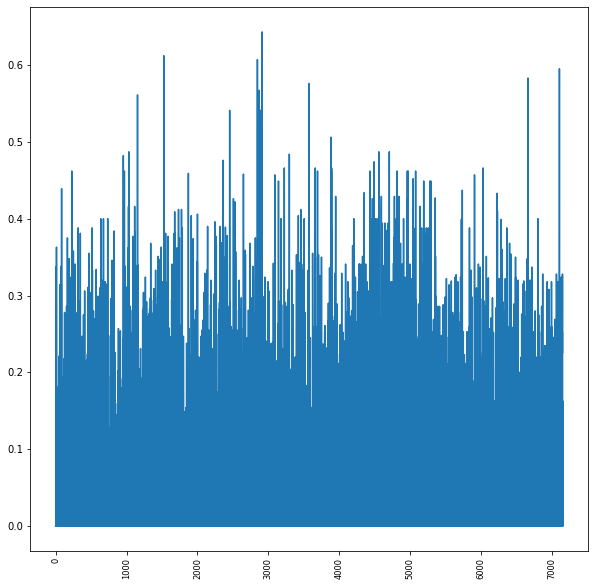

In [244]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(en_only['neg'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

###### Re-printing the dataframe to screen to ensure data integrity with the added VADER scores:

In [245]:
en_only

,Unnamed: 0,Date,Title,Url,Domain,Language,Author,Full Name,Full Text,Impressions,...,text_lower,tokens,filtered,no_punct,freqs1,f1_counts,vader_scores,pos,neu,neg
0,0,2013-04-04 23:59:06.0,RT @MarionGroves Abbott says 10yrs ago he wore...,http://twitter.com/Qldaah/statuses/31996236101...,twitter.com,en,Qldaah,Qldaah (David Marler),RT @MarionGroves Abbott says 10yrs ago he wore...,1413,...,rt @mariongroves abbott says 10yrs ago he wore...,"[rt, @, mariongroves, abbott, says, 10yrs, ago...","[rt, @, mariongroves, abbott, says, 10yrs, ago...","[rt, mariongroves, abbott, says, 10yrs, ago, w...","{'rt': 1, 'mariongroves': 1, 'abbott': 1, 'say...","{'rt': 1, 'mariongroves': 1, 'abbott': 1, 'say...","{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...",0.073,0.927,0.000
1,2,2013-04-04 23:58:04.0,RT @NSWFarmers RT @AustFarmInstitu: Two climat...,http://twitter.com/TheFacelessSpin/statuses/31...,twitter.com,en,TheFacelessSpin,TheFacelessSpin (FacelessFocusGroup),RT @NSWFarmers RT @AustFarmInstitu: Two climat...,1063,...,rt @nswfarmers rt @austfarminstitu: two climat...,"[rt, @, nswfarmers, rt, @, austfarminstitu, :,...","[rt, @, nswfarmers, rt, @, austfarminstitu, :,...","[rt, nswfarmers, rt, austfarminstitu, two, cli...","{'rt': 2, 'nswfarmers': 1, 'austfarminstitu': ...","{'rt': 2, 'nswfarmers': 1, 'austfarminstitu': ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000
2,3,2013-04-04 23:57:33.0,Steve Stockman Hopes James Hansen's NASA Retir...,http://twitter.com/iamgreenbean/statuses/31996...,twitter.com,en,iamgreenbean,iamgreenbean (Green Bean),Steve Stockman Hopes James Hansen's NASA Retir...,4365,...,steve stockman hopes james hansen's nasa retir...,"[steve, stockman, hopes, james, hansen, 's, na...","[steve, stockman, hopes, james, hansen, nasa, ...","[steve, stockman, hopes, james, hansen, nasa, ...","{'steve': 1, 'stockman': 1, 'hopes': 1, 'james...","{'steve': 1, 'stockman': 1, 'hopes': 1, 'james...","{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...",0.319,0.681,0.000
3,4,2013-04-04 23:57:01.0,Ted Turner Tells Obama to Get 'Climate Change ...,http://twitter.com/cpwilldo/statuses/319961839...,twitter.com,en,cpwilldo,cpwilldo (chris price),Ted Turner Tells Obama to Get 'Climate Change ...,3477,...,ted turner tells obama to get 'climate change ...,"[ted, turner, tells, obama, to, get, 'climate,...","[ted, turner, tells, obama, get, 'climate, cha...","[ted, turner, tells, obama, get, 'climate, cha...","{'ted': 1, 'turner': 1, 'tells': 1, 'obama': 1...","{'ted': 1, 'turner': 1, 'tells': 1, 'obama': 1...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000
4,5,2013-04-04 23:56:52.0,The human race will never fully adapt to clima...,http://twitter.com/GreenSteve_com/statuses/319...,twitter.com,en,GreenSteve_com,GreenSteve_com (Green Steve),The human race will never fully adapt to clima...,5298,...,the human race will never fully adapt to clima...,"[the, human, race, will, never, fully, adapt, ...","[human, race, never, fully, adapt, climate, ch...","[human, race, never, fully, adapt, climate, ch...","{'human': 1, 'race': 1, 'never': 1, 'fully': 1...","{'human': 1, 'race': 1, 'never': 1, 'fully': 1...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7146,10062,2013-04-03 00:01:46.0,RT @SebHenbest The @ClimateComm new report lin...,http://twitter.com/kmac/statuses/3192382570051...,twitter.com,en,kmac,kmac (Kate Mackenzie),RT @SebHenbest The @ClimateComm new report lin...,3826,...,rt @sebhenbest the @climatecomm new report lin...,"[rt, @, sebhenbest, the, @, climatecomm, new, ...","[rt, @, sebhenbest, @, climatecomm, new, repor...","[rt, sebhenbest, climatecomm, new, report, lin...","{'rt': 1, 'sebhenbest': 1, 'climatecomm': 1, '...","{'rt': 1, 'sebhenbest': 1, 'climatecomm': 1, '...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000
7147,10063,2013-04-03 00:01:26.0,Thin

In [246]:
from natsort import index_natsorted
import numpy as np

###### Sorting the dataframe by highest positive VADER values:

In [247]:
en_only.sort_values(
   by="pos", ascending=False,
   key=lambda x: np.argsort(index_natsorted(en_only["pos"]))
)

,Unnamed: 0,Date,Title,Url,Domain,Language,Author,Full Name,Full Text,Impressions,...,text_lower,tokens,filtered,no_punct,freqs1,f1_counts,vader_scores,pos,neu,neg
69,89,2013-04-04 23:32:22.0,Fascinating! #TNOT #climatechange,http://twitter.com/Peady/statuses/319955635385...,twitter.com,en,Peady,Peady (Peady),Fascinating! #TNOT #climatechange,1330,...,fascinating! #tnot #climatechange,"[fascinating, !, #, tnot, #, climatechange]","[fascinating, !, #, tnot, #, climatechange]","[fascinating, tnot, climatechange]","{'fascinating': 1, 'tnot': 1, 'climatechange': 1}","{'fascinating': 1, 'tnot': 1, 'climatechange': 1}","{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",0.655,0.345,0.000
2453,3409,2013-04-04 10:32:20.0,@ar_abbe hahaha.. #climatechange,http://twitter.com/edddiii10/statuses/31975933...,twitter.com,en,edddiii10,edddiii10 (Ed-Hem™ ),@ar_abbe hahaha.. #climatechange,340,...,@ar_abbe hahaha.. #climatechange,"[@, ar_abbe, hahaha, .., #, climatechange]","[@, ar_abbe, hahaha, .., #, climatechange]","[ar_abbe, hahaha, .., climatechange]","{'ar_abbe': 1, 'hahaha': 1, '..': 1, 'climatec...","{'ar_abbe': 1, 'hahaha': 1, '..': 1, 'climatec...","{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'comp...",0.643,0.357,0.000
3067,4398,2013-04-04 03:33:15.0,Climate change haha,http://twitter.com/NicoleSadsad/statuses/31965...,twitter.com,en,NicoleSadsad,NicoleSadsad (N I K K I),Climate change haha,96,...,climate change haha,"[climate, change, haha]","[climate, change, haha]","[climate, change, haha]","{'climate': 1, 'change': 1, 'haha': 1}","{'climate': 1, 'change': 1, 'haha': 1}","{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.600,0.400,0.000
5359,7519,2013-04-03 14:12:22.0,Congratulations James Hansen of @NASAGoddard! ...,http://twitter.com/rfertel/statuses/3194523196...,twitter.com,en,rfertel,rfertel (Randy Fertel),Congratulations James Hansen of @NASAGoddard! ...,620,...,congratulations james hansen of @nasagoddard! ...,"[congratulations, james, hansen, of, @, nasago...","[congratulations, james, hansen, @, nasagoddar...","[congratulations, james, hansen, nasagoddard, ...","{'congratulations': 1, 'james': 1, 'hansen': 1...","{'congratulations': 1, 'james': 1, 'hansen': 1...","{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.552,0.448,0.000
4390,6276,2013-04-03 18:59:22.0,Looking for great #design ideas that champion ...,http://twitter.com/TheFutureFood/statuses/3195...,twitter.com,en,TheFutureFood,TheFutureFood (FIELD TO FORK),Looking for great #design ideas that champion ...,38,...,looking for great #design ideas that champion ...,"[looking, for, great, #, design, ideas, that, ...","[looking, great, #, design, ideas, champion, #...","[looking, great, design, ideas, champion, clim...","{'looking': 1, 'great': 1, 'design': 1, 'ideas...","{'looking': 1, 'great': 1, 'design': 1, 'ideas...","{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'comp...",0.529,0.471,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,15,2013-04-04 23:53:46.0,RT @GreenIsTweet #ClimateChange Will Double Ar...,http://twitter.com/GreenL4L/statuses/319961021...,twitter.com,en,GreenL4L,GreenL4L (Green Living 4 LIve),RT @GreenIsTweet #ClimateChange Will Double Ar...,3,...,rt @greenistweet #climatechange will double ar...,"[rt, @, greenistweet, #, climatechange, will, ...","[rt, @, greenistweet, #, climatechange, double...","[rt, greenistweet, climatechange, double, area...","{'rt': 1, 'greenistweet': 1, 'climatechange': ...","{'rt': 1, 'greenistweet': 1, 'climatechange': ...","{'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'comp...",0.000,0.924,0.076
7,14,2013-04-04 23:53:56.0,#VanNews BC political candidates tackle climat...,http://twitter.com/liveincommunity/statuses/31...,twitter.com,en,liveincommunity,liveincommunity (Lee),#VanNews BC political candidates tackle climat...,1351,...,#vannews bc political candidates tackle climat...,"[#, vannews, bc, political, candidates, tackle...","[#, vannews, bc, political, candidates, tackle.

###### Create a data set for the 500 Tweets with the highest positive VADER score:

In [248]:
topPOS = en_only.sort_values(
   by="pos", ascending=False,
   key=lambda x: np.argsort(index_natsorted(en_only["pos"]))
)
top500POS = topPOS.head(500)
print(top500POS)

      Unnamed: 0                   Date  \
69            89  2013-04-04 23:32:22.0   
2453        3409  2013-04-04 10:32:20.0   
3067        4398  2013-04-04 03:33:15.0   
5359        7519  2013-04-03 14:12:22.0   
4390        6276  2013-04-03 18:59:22.0   
...          ...                    ...   
4011        5785  2013-04-03 21:07:15.0   
4009        5779  2013-04-03 21:08:08.0   
3981        5738  2013-04-03 21:21:37.0   
3949        5695  2013-04-03 21:31:33.0   
3919        5653  2013-04-03 21:41:33.0   

                                                  Title  \
69                    Fascinating! #TNOT #climatechange   
2453                   @ar_abbe hahaha.. #climatechange   
3067                                Climate change haha   
5359  Congratulations James Hansen of @NASAGoddard! ...   
4390  Looking for great #design ideas that champion ...   
...                                                 ...   
4011  RT @RobertKleiburg Excellent animation showing...   
4009  RT @R

###### Create a data set for the lowest 500 positive-scoring Tweets:

In [249]:
bottomPOS = en_only.sort_values(
   by="pos", ascending=True,
   key=lambda x: np.argsort(index_natsorted(en_only["pos"]))
)
bottom500POS = bottomPOS.head(500)
print(bottom500POS)

     Unnamed: 0                   Date  \
1             2  2013-04-04 23:58:04.0   
3             4  2013-04-04 23:57:01.0   
4             5  2013-04-04 23:56:52.0   
7            14  2013-04-04 23:53:56.0   
8            15  2013-04-04 23:53:46.0   
..          ...                    ...   
780        1097  2013-04-04 19:10:32.0   
781        1099  2013-04-04 19:10:11.0   
785        1106  2013-04-04 19:07:27.0   
788        1109  2013-04-04 19:07:19.0   
790        1111  2013-04-04 19:07:14.0   

                                                 Title  \
1    RT @NSWFarmers RT @AustFarmInstitu: Two climat...   
3    Ted Turner Tells Obama to Get 'Climate Change ...   
4    The human race will never fully adapt to clima...   
7    #VanNews BC political candidates tackle climat...   
8    RT @GreenIsTweet #ClimateChange Will Double Ar...   
..                                                 ...   
780  RT @Vision23 It is a hoax that climate change ...   
781  RT @edmontonjournal Albert

###### Create a data set for the highest 500 neutral-scoring Tweets:

In [250]:
topNEU = en_only.sort_values(
   by="neu", ascending=False,
   key=lambda x: np.argsort(index_natsorted(en_only["neu"]))
)
top500NEU = topNEU.head(500)
print(top500NEU)

      Unnamed: 0                   Date  \
7149       10071  2013-04-03 00:00:21.0   
7146       10062  2013-04-03 00:01:46.0   
7142       10056  2013-04-03 00:03:20.0   
7141       10055  2013-04-03 00:03:47.0   
7140       10054  2013-04-03 00:03:55.0   
...          ...                    ...   
5220        7337  2013-04-03 14:59:46.0   
5218        7332  2013-04-03 15:00:09.0   
5217        7331  2013-04-03 15:00:22.0   
5215        7326  2013-04-03 15:01:04.0   
5209        7318  2013-04-03 15:02:21.0   

                                                  Title  \
7149  #GlobalWarming Accelerating, Study Says - http...   
7146  RT @SebHenbest The @ClimateComm new report lin...   
7142  Wash. state climate change bill signed into la...   
7141  Survey Shows Many Republicans Feel America Sho...   
7140  RT @TFFInsights #Tropical forests more resilie...   
...                                                 ...   
5220  World Bank chief: #climatechange is “fundament...   
5218  RT @S

###### Create a data set for the lowest 500 neutral-scoring Tweets:

In [251]:
bottomNEU = en_only.sort_values(
   by="neu", ascending=True,
   key=lambda x: np.argsort(index_natsorted(en_only["neu"]))
)
bottom500NEU = bottomNEU.head(500)
print(bottom500NEU)

      Unnamed: 0                   Date  \
1872        2590  2013-04-04 13:52:34.0   
69            89  2013-04-04 23:32:22.0   
2453        3409  2013-04-04 10:32:20.0   
2912        4098  2013-04-04 05:40:33.0   
3135        4498  2013-04-04 02:51:42.0   
...          ...                    ...   
681          964  2013-04-04 19:38:56.0   
1196        1636  2013-04-04 17:09:16.0   
1597        2213  2013-04-04 15:02:50.0   
2266        3164  2013-04-04 11:50:40.0   
2651        3715  2013-04-04 08:47:25.0   

                                                  Title  \
1872  Suicide: The green option! Love the planet? Ki...   
69                    Fascinating! #TNOT #climatechange   
2453                   @ar_abbe hahaha.. #climatechange   
2912  Climate change sceptic rejects criticism as 'h...   
3135  Kim Vows Increased #ClimateChange Role to Help...   
...                                                 ...   
681   @FaunKime Thanks for following. #climatechange...   
1196  @besp

###### Create a data set for the highest 500 negative-scoring Tweets:

In [252]:
topNEG = en_only.sort_values(
   by="neg", ascending=False,
   key=lambda x: np.argsort(index_natsorted(en_only["neg"]))
)
top500NEG = topNEG.head(500)
print(top500NEG)

      Unnamed: 0                   Date  \
2912        4098  2013-04-04 05:40:33.0   
1526        2116  2013-04-04 15:21:54.0   
2845        4005  2013-04-04 06:33:04.0   
7102        9996  2013-04-03 00:21:53.0   
6659        9348  2013-04-03 04:13:20.0   
...          ...                    ...   
394          545  2013-04-04 21:26:43.0   
2448        3401  2013-04-04 10:35:16.0   
1515        2098  2013-04-04 15:25:02.0   
482          682  2013-04-04 20:50:25.0   
6635        9315  2013-04-03 04:24:34.0   

                                                  Title  \
2912  Climate change sceptic rejects criticism as 'h...   
1526  ClimateChange worse than hoax. Pretext4forcing...   
2845  Climate change sceptic rejects criticism as 'h...   
7102  ClimateChange worse than hoax. Pretext4forcing...   
6659  "World Bank adds climate change to poverty fig...   
...                                                 ...   
394   RT@HuffingtonPost: People may not want to hear...   
2448  #Clim

###### Finally, create a data set for the lowest 500 negative-scoring Tweets:

In [253]:
bottomNEG = en_only.sort_values(
   by="neg", ascending=True,
   key=lambda x: np.argsort(index_natsorted(en_only["neg"]))
)
bottom500NEG = bottomNEG.head(500)
print(bottom500NEG)

     Unnamed: 0                   Date  \
0             0  2013-04-04 23:59:06.0   
1             2  2013-04-04 23:58:04.0   
2             3  2013-04-04 23:57:33.0   
3             4  2013-04-04 23:57:01.0   
4             5  2013-04-04 23:56:52.0   
..          ...                    ...   
798        1119  2013-04-04 19:05:22.0   
799        1120  2013-04-04 19:05:12.0   
801        1123  2013-04-04 19:04:58.0   
803        1125  2013-04-04 19:04:30.0   
804        1126  2013-04-04 19:04:15.0   

                                                 Title  \
0    RT @MarionGroves Abbott says 10yrs ago he wore...   
1    RT @NSWFarmers RT @AustFarmInstitu: Two climat...   
2    Steve Stockman Hopes James Hansen's NASA Retir...   
3    Ted Turner Tells Obama to Get 'Climate Change ...   
4    The human race will never fully adapt to clima...   
..                                                 ...   
798  RT @ClimateReality Western Colorado faces 5x i...   
799  @ClimateReality What clima

###### Comparing the number of Impressions garnered by the highest-positive-scoring Tweets to the number of Impressions garnered by the lowest-positive-scoring Tweets:

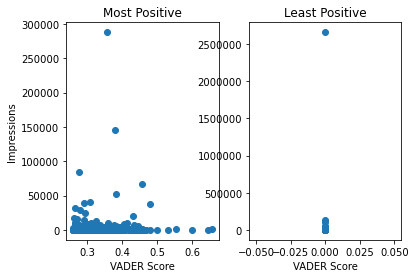

In [254]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(top500POS['pos'], top500POS['Impressions'])
ax2.scatter(bottom500POS['pos'], bottom500POS['Impressions'])

ax1.set_xlabel('VADER Score')
ax1.set_ylabel('Impressions')
ax1.set_title("Most Positive")
ax1.ticklabel_format(useOffset=False, style='plain')

ax2.set_xlabel('VADER Score')
ax2.set_title("Least Positive")
ax2.ticklabel_format(useOffset=False, style='plain')

plt.show()

In [255]:
top500POS['Impressions'].mean()

3031.61

In [256]:
bottom500POS['Impressions'].mean()

7772.746

###### Comparing the number of Impressions garnered by the highest-neutral-scoring Tweets to the number of Impressions garnered by the lowest-neutral-scoring Tweets:

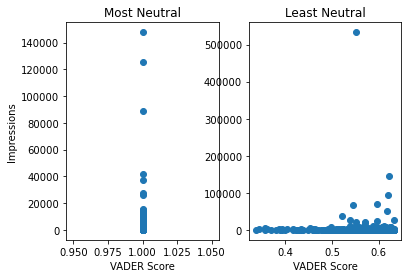

In [257]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(top500NEU['neu'], top500NEU['Impressions'])
ax2.scatter(bottom500NEU['neu'], bottom500NEU['Impressions'])

ax1.set_xlabel('VADER Score')
ax1.set_ylabel('Impressions')
ax1.set_title("Most Neutral")
ax1.ticklabel_format(useOffset=False, style='plain')

ax2.set_xlabel('VADER Score')
ax2.set_title("Least Neutral")
ax2.ticklabel_format(useOffset=False, style='plain')

plt.show()

In [258]:
top500NEU['Impressions'].mean()

2248.856

In [259]:
bottom500NEU['Impressions'].mean()

3299.662

###### Comparing the number of Impressions garnered by the highest-negative-scoring Tweets to the number of Impressions garnered by the lowest-negative-scoring Tweets:

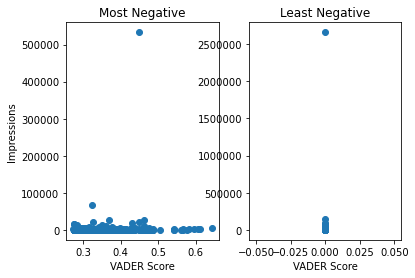

In [260]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(top500NEG['neg'], top500NEG['Impressions'])
ax2.scatter(bottom500NEG['neg'], bottom500NEG['Impressions'])

ax1.set_xlabel('VADER Score')
ax1.set_ylabel('Impressions')
ax1.set_title("Most Negative")
ax1.ticklabel_format(useOffset=False, style='plain')

ax2.set_xlabel('VADER Score')
ax2.set_title("Least Negative")
ax2.ticklabel_format(useOffset=False, style='plain')

plt.show()

In [261]:
top500NEG['Impressions'].mean()

2482.024

In [262]:
bottom500NEG['Impressions'].mean()

7582.926

<h3>Conclusion:</h3>

The highest number of average impressions are actually the Tweets with the *lowest* positivity and the *lowest* negativity scores, with 7,772.75 and 7,582.93 impressions, respectively.

These Tweets far and away outperformed highly negative and highly positive Tweets, as well as both highly and lowly neutral Tweets, as none of these categories averaged above 3,300 impressions.

This outcome definitely surprised me, but I can think of a couple other angles I would approach in analyzing this data, given more knowledge of the coding and math needed.

First, it's conceivable that the Tweets that received the lowest positive scores, and the Tweets that received the lowest negative scores may have simply been authored by professional outlets with more followers and larger reach, and received more impressions simply as a function of their reach versus the content or tone of their Tweets.

Secondly, I'd be curious to really do a manual deep dive into both the contents of this Twitter data, and of the VADER database, because it feels like for a topic like human-activity-induced climate change, "positive" and "negative" may be inversed and VADER scores may have less meaning than in other topics. 

As an example:

In [280]:
print(en_only['Full Text'][637])

Tree death toll from climate change likely underestimated http://t.co/SKPzif2AoQ #bcpoli #cdnpoli


In [282]:
en_only['vader_scores'][637]['pos']

0.0

In [283]:
en_only['vader_scores'][637]['neu']

0.6

In [284]:
en_only['vader_scores'][637]['neg']

0.4

This is a Tweet that VADER scored negatively, presumably due to the word "death", but in terms of climate change from the perspective of someone who understands / "believes in" the science and the phenomenon, this may be seen as a "positive" Tweet, because it seems likely that the account which authored this Tweet feels similarly.  

This shows the limitations of automated text analysis, devoid of context, without at least the aid of AI or initial input from the data analyst attempting to define what should be taken as "positive" or "negative" given the hypothesis being investigated.